# Business Problem 

A bank would like to increase their revenue by having more of their clients subscribe to long-term deposits. The bank aims to identify which of their existing clients have higher chances of subscribing to long-term deposits when they are contacted through a telemarketing campaign. This information would help the bank to improve their conversion rate (more customers subscribing to long-term deposits from of a fixed number of calls made) by:

- Concentrating their telemarketing efforts on clients more likely to subscribe.
- Planning details of future telemarketing campaigns that are more likely to succeed.

# Data Science Problem

The bank marketing dataset contains historic data collected from direct telemarketing campaigns of a Portuguese retail bank to their clients to sell long-term deposits, along with outcomes for each client (success/failure). We can therefore train a machine learning model that takes this information as input features, and predict the binary outcome of whether a client will subscribe to the long-term deposit or not.

# Dataset exploration

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [46]:
path = '../data/bank-additional-full.csv'
df = pd.read_csv(path,delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
print(f'The dataset has {len(df)} records from past telemarketing campaigns.')
print(f'Each record has {df.shape[1]-1} features and the last column in the dataframe indicates the outcome of the campaign (subscribed or not subscribed).')

The dataset has 41188 records from past telemarketing campaigns.
Each record has 20 features and the last column in the dataframe indicates the outcome of the campaign (subscribed or not subscribed).


### Feature descriptions

|Feature|Feature Type|Description|
|-----|-----|-----|
|age|Numeric|Age of the client|
|job|Categorical, Nominal|Job held by the client ('admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management','retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')|
|marital|Categorical, Nominal|Marital status of the client ('divorced', 'married', 'single', 'unknown'; note: 'divorced' includes divorced and widowed)|
|education|Categorical, Nominal|Educational qualification of the client ('basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')|
|default|Categorical, Nominal|Does client have credit in default? ('no', 'yes', 'unknown')|
|housing|Categorical, Nominal|Does client have a housing loan? ('no', 'yes', 'unknown')|
|loan|Categorical, Nominal|Does client have a personal loan? ('no', 'yes', 'unknown')|
|contact|Categorical, Nominal|How was the client contacted ('telephone', 'cellular')|
|month|Categorical, Ordinal|Month of year of last contact ('jan', 'feb', 'mar', ..., 'nov', 'dec)|
|day_of_week|Categorical, Ordinal|Day of week of last contact ('mon', 'tue', 'wed', 'thu', 'fri')|
|duration|Numeric|Duration in seconds of last contact|
|campaign|Numeric|Number of times the client was contacted during this campaign (includes last contact)|
|pdays|Numerical|Number of days since the client was last contacted for a previous campaign; 999 means client was not contacted previously|
|previous|Numeric|Number of times client was contacted before this campaign|
|poutcome|Categorical, Nominal|Outcome of the previous marketing campaign (failure', 'nonexistent', 'success')|
|emp.var.rate|Numeric|Employment variation rate, quarterly indicator|
|cons.price.idx|Numeric|Consumer price index, monthly indicator|
|cons.conf.idx|Numeric|Consumer confidence index, monthly indicator|
|euribor3m|Numeric|Euribor 3 month rate, monthly indicator|
|nr.employed|Numeric|Number of employees, quarterly indicator|

So, the features can be broadly divided into the following 3 categories:

- **Client data:** Features related to the client, e.g. age, job, marital status, education, default status, housing and personal loan status.
- **Campaign data:** Features related to the current and previous campaigns, e.g. communication type, month and day of week of last contact, duration of last contact, number of contacts during current campaign, number of days since last contact for a previous campaign, number of contacts before current campaign and outcome of previous campaign.
- **Economy data:** Features related to the economic attributes, e.g.employment variation rate, consumer price index, consumer confidence index, euribor 3 month rate and number of employees.

### Target variable

|Target|Type|Description|
|-----|-----|-----|
|y|Binary|Has the client subscribed to a long-term deposit? ('yes', 'no')|

### Separate out the features and the target variable

In [47]:
df_y = df['y']
df_x = df.drop(['y'], 1)
df_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


### Check numerical and categorical features 

In [49]:
numeric_columns = df_x.select_dtypes(include=np.number).columns
print('The numeric features are:')
df_x[numeric_columns].head()

The numeric features are:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [50]:
categorical_columns = df_x.select_dtypes(exclude=np.number).columns
print('The categorical features are:')
df_x[categorical_columns].head()

The categorical features are:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


### Check for any missing data

In [60]:
# Returns total number of missing values and percentage of missing values for each column in the dataframe
def count_missing_values(dataframe):
    
    total = dataframe.isnull().sum()
    percent = (dataframe.isnull().sum())/(len(dataframe))
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return missing_data

missing_data = count_missing_values(df)
print(missing_data)

                Total  Percent
age                 0      0.0
job                 0      0.0
marital             0      0.0
education           0      0.0
default             0      0.0
housing             0      0.0
loan                0      0.0
contact             0      0.0
month               0      0.0
day_of_week         0      0.0
duration            0      0.0
campaign            0      0.0
pdays               0      0.0
previous            0      0.0
poutcome            0      0.0
emp.var.rate        0      0.0
cons.price.idx      0      0.0
cons.conf.idx       0      0.0
euribor3m           0      0.0
nr.employed         0      0.0
y                   0      0.0


The dataset does not have any missing values in any of the columns. So we would not have to worry about dropping any rows or imputing the missing values.

### Check class distribution in the target variable

In [61]:
class_distribution = (df_y.value_counts()/df_y.value_counts().sum())*100
print(class_distribution)

no     88.734583
yes    11.265417
Name: y, dtype: float64


So the dataset is heavily imbalanced. Almost 89% of the clients from the telemarketing campaign records did not subscribe to long-term deposits.

# Dataset visualization and cleaning

### Univariate analysis of categorical features

Here, we will look at the distribution of unique values for each categorical feature in the dataset.

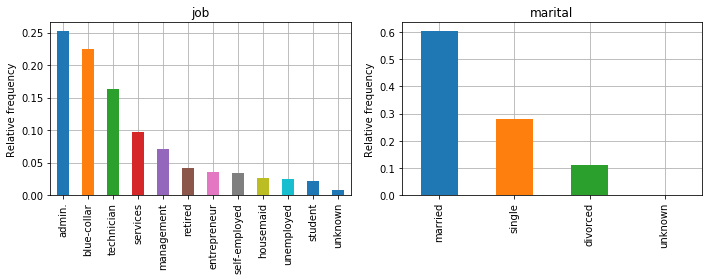

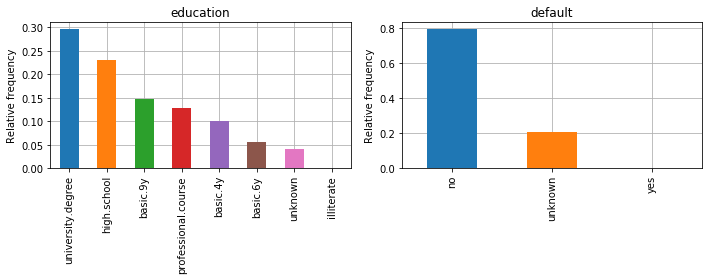

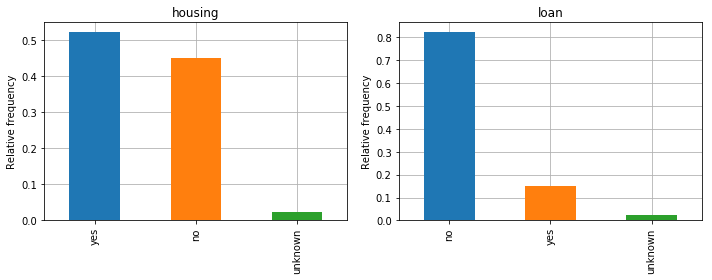

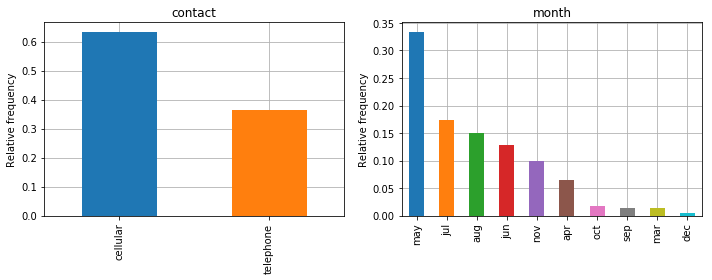

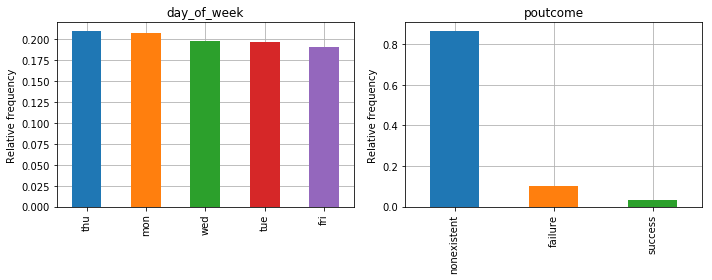

In [75]:
plt.rcParams['axes.axisbelow'] = True
for i in range(0, len(categorical_columns), 2):
    if i!=len(categorical_columns)-1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        df_x[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
        plt.title(categorical_columns[i])
        plt.ylabel('Relative frequency')
        plt.tight_layout()
        plt.grid(True)
        plt.subplot(122)
        df_x[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
        plt.title(categorical_columns[i+1])
        plt.ylabel('Relative frequency')
        plt.tight_layout()
        plt.grid(True)
    else:
        df_x[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
        plt.title(categorical_columns[i])
        plt.ylabel('Relative frequency')

### Observations:

- Most of the clients have administrative, blue collar, technician or service jobs.
- Almost 60% of the clients are married.
- More than 50% of the clients hold high-school or university degrees. Almost none are illiterate.
- 80% of the clients have not defaulted.
- There is an almost even breakdown of people who have housing loans and people who do not, although almost 80% of the people do not have a personal loan.
- More than 60% of the people were contacted via cellular phone.
- Most of the calls were placed over the summer months (May - August).
- Calls were evenly distributed from Monday to Friday.
- More than 85% of the people were not contacted in the marketing campaign prior to when the data was collected.

### Impute unknown values from categorical columns

Values marked 'unknown' are present in a few categorical columns, including job, marital, education, default, housing and loan. None of these columns have more than 5% of their values marked 'unknown' though. We will impute these values with the mode (most frequently occurring element) of the corresponding categorical column.

In [76]:
for column in categorical_columns:
    df_x[column] = df_x[column].str.replace('unknown', df_x[column].mode()[0])
df_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
